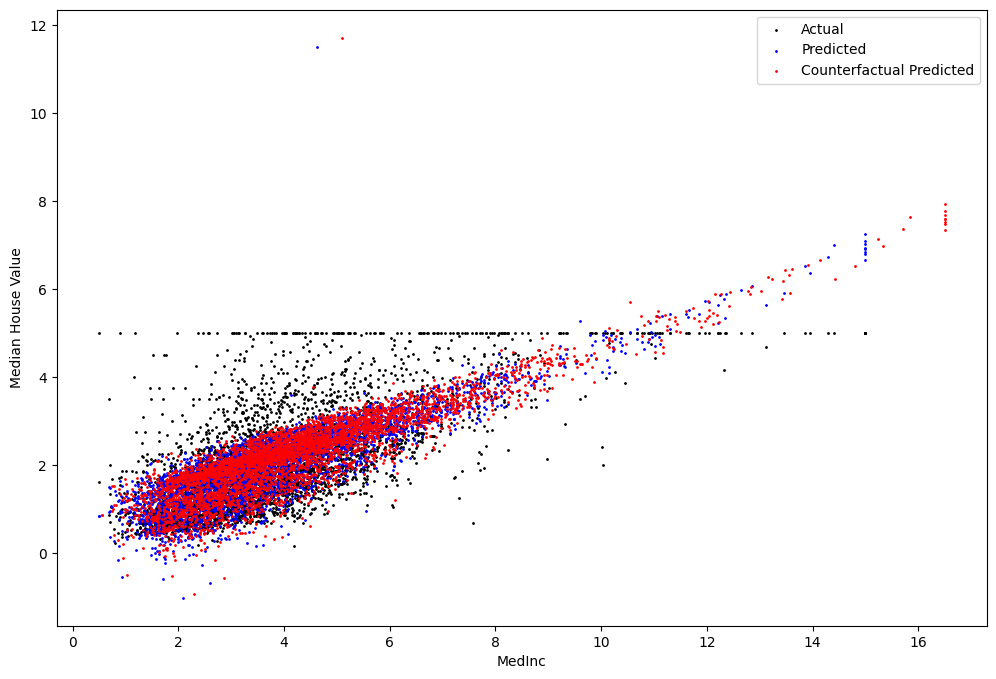

Income coefficient in model: 0.45
Average current income: $3.87
Median property value: $2.06
Desired income to achieve a 5% increase in target value: $0.23
Percentage increase in income needed: 5.92%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a feature for counterfactual analysis (e.g., median income)
feature_index = feature_names.index('MedInc')

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Perform counterfactual analysis
# Let's increase the median income by 10% and see the effect on the median house value
X_test_counterfactual = np.copy(X_test)
X_test_counterfactual[:, feature_index] *= 1.1

predictions_counterfactual = model.predict(X_test_counterfactual)

# Visualize the results
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.scatter(X_test[:, feature_index], y_test, color='black', label='Actual',s=1)
plt.scatter(X_test[:, feature_index], predictions, color='blue', label='Predicted',s=1)
plt.scatter(X_test_counterfactual[:, feature_index], predictions_counterfactual, color='red', label='Counterfactual Predicted',s=1)
plt.xlabel(housing.feature_names[feature_index])
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# Calculate the average target value in the test set
average_target_value = np.mean(y_test)

# Calculate the desired increase in the target value (5% increase)
desired_increase = 0.05 * average_target_value

# Calculate the necessary change in median income
# Extract the coefficient for median income
income_coefficient = model.coef_[feature_index]

# The relationship is target = intercept + (coef * income) + ...
# Solving for the required income change to achieve the desired target increase
reqd_income_increase = desired_increase / income_coefficient

# Calculate the current average income in the dataset for reference
average_income = np.mean(X[:, feature_index])

# Calculate the percentage increase in income needed
percentage_increase_needed = (reqd_income_increase / average_income) * 100

print(f"Income coefficient in model: {income_coefficient:.2f}")
print(f"Average current income: ${average_income:.2f}")
print(f"Median property value: ${average_target_value:.2f}")
print(f"Desired income to achieve a 5% increase in target value: ${reqd_income_increase:.2f}")
print(f"Percentage increase in income needed: {percentage_increase_needed:.2f}%")
